<a href="https://colab.research.google.com/github/gundaminpde/2022/blob/main/Iris_softmax_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# 1. 데이터 로드 및 전처리
iris = load_iris()
X = iris['data']  # 입력 데이터 (4개의 특성)
t = iris['target']  # 타겟 데이터 (0, 1, 2의 세 클래스)


In [ ]:
print(X[:5, :])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print(t[:5])

[0 0 0 0 0]


In [2]:
# 2. 타겟 데이터를 one-hot 인코딩으로 변환 (3개의 클래스를 one-hot 형식으로 변환)
encoder = OneHotEncoder(sparse_output=False)
t_onehot = encoder.fit_transform(t.reshape(-1, 1))


# **OneHotEncoder**는 Scikit-learn에서 제공하는 클래스입니다.
# one-hot encoding은 범주형 데이터를 0과 1의 벡터로 변환하는 방법입니다.
# 예를 들어, y 값이 [0, 1, 2]라는 세 개의 클래스로 이루어진 데이터라면,
# 이를 one-hot encoding으로 변환하면 각각 [1, 0, 0], [0, 1, 0], [0, 0, 1]이 됩니다.
# **sparse_output=False**는 결과를 밀집(dense) 형태의 배열로 반환하도록 지정합니다.
# 기본값은 True로 **희소 행렬(sparse matrix)**를 반환하지만, 이 코드는 밀집 배열로 반환되기를 원하기 때문에 False로 설정합니다.
# 희소 행렬(sparse matrix)은 대부분의 값이 0인 행렬로, 메모리 절약을 위해 0이 아닌 값만 저장하는 구조를 말합니다. 하지만 딥러닝 모델에서는 주로 **밀집 행렬(dense matrix)**을 사용합니다.

# reshape(-1, 1): reshape는 배열의 크기를 변경하는 함수입니다.
#-1은 자동으로 적절한 크기를 맞추도록 설정하는 의미로 사용됩니다. 즉, 배열의 길이에 따라 행의 개수를 자동으로 설정합니다.

In [3]:

# 3. 데이터를 훈련셋과 테스트셋으로 나누기
X_train, X_test, t_train, t_test = train_test_split(X, t_onehot, test_size=0.2, random_state=42)

# 4. 데이터 표준화 (평균 0, 표준편차 1로 맞춤)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. 신경망 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  # 입력 레이어 (4개의 입력 특성)
    tf.keras.layers.Dense(64, activation='relu'),  # 첫 번째 hidden layer
    tf.keras.layers.Dense(32, activation='relu'),  # 두 번째 hidden layer
    tf.keras.layers.Dense(16, activation='relu'),  # 세 번째 hidden layer
    tf.keras.layers.Dense(8, activation='relu'),   # 네 번째 hidden layer
    tf.keras.layers.Dense(3, activation='softmax')  # 출력 레이어 (3개의 뉴런, softmax 활성화 함수)
])

# 6. 모델 컴파일 (categorical cross-entropy를 손실 함수로 사용)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 7. 모델 학습
history = model.fit(X_train, t_train, epochs=60, batch_size=16, validation_split=0.2)

# 8. 테스트셋으로 모델 평가
test_loss, test_acc = model.evaluate(X_test, t_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

# 9. 모델 요약
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 9s 178ms/step - accuracy: 0.2516 - loss: 1.0837 - val_accuracy: 0.5417 - val_loss: 0.9917
Epoch 2/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3996 - loss: 1.0263 - val_accuracy: 0.6667 - val_loss: 0.9245
Epoch 3/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5982 - loss: 0.9943 - val_accuracy: 0.7500 - val_loss: 0.8641
Epoch 4/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6161 - loss: 0.9414 - val_accuracy: 0.7500 - val_loss: 0.8012
Epoch 5/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6757 - loss: 0.8957 - val_accuracy: 0.7500 - val_loss: 0.7395
Epoch 6/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7164 - loss: 0.8257 - val_accuracy: 0.7500 - val_loss: 0.6846
Epoch 7/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7164 - loss: 0.7843 - val_accuracy: 0.7917 - val_loss: 0.6375
Epoch 8/60
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7521 - loss: 0.7524 - val_accuracy: 0.7917 - val_loss: 0.5913

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,275 (36.23 KB)

 Trainable params: 3,091 (12.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,184 (24.16 KB)

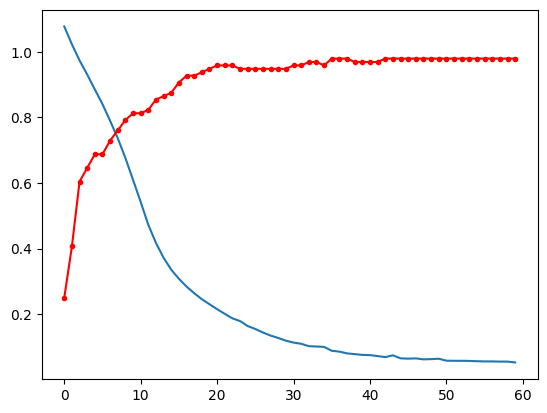

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


y_loss = history.history['loss']
y_accu = history.history['accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len,y_loss)
plt.plot(x_len,y_accu, marker='.', c="red")

plt.show()

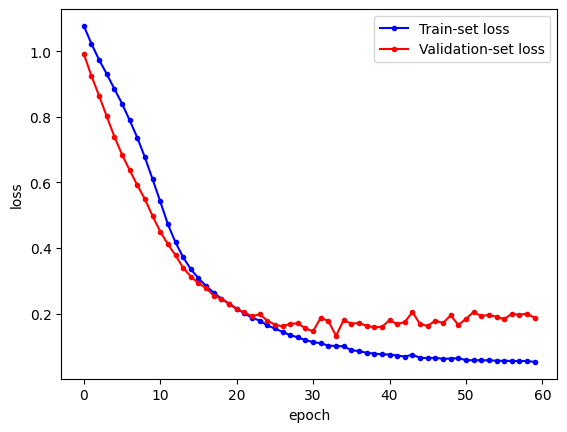

In [6]:

y_val_loss = history.history['val_loss']

plt.plot(x_len,y_loss, marker='.', c="blue", label='Train-set loss')
plt.plot(x_len,y_val_loss, marker='.', c="red",label='Validation-set loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()